In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
%load_ext autotime

time: 0 ns (started: 2021-05-21 16:38:02 +03:00)


In [ ]:
from hatesonar import Sonar
sonar = Sonar()
#sonar.ping(text="At least I'm not a nigger")

In [4]:
import gensim.corpora as corpora
from pprint import pprint
import os

time: 0 ns (started: 2021-05-21 16:38:05 +03:00)


In [5]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

time: 0 ns (started: 2021-05-21 16:38:06 +03:00)


In [6]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

time: 203 ms (started: 2021-05-21 16:38:06 +03:00)


In [18]:
train = pd.read_csv(r'C:\Users\shakshi\Downloads\train.csv\train.csv')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time: 969 ms (started: 2021-05-21 16:48:18 +03:00)


In [19]:
test = pd.read_csv(r'C:\Users\shakshi\Downloads\test.csv\test.csv')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time: 250 ms (started: 2021-05-21 16:48:20 +03:00)


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
time: 15 ms (started: 2021-05-21 16:48:21 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB
time: 16 ms (started: 2021-05-21 16:48:21 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
train.head()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


time: 15 ms (started: 2021-05-21 16:48:22 +03:00)


In [23]:
df = train.append(test)

time: 16 ms (started: 2021-05-21 16:48:25 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      26000 non-null  int64  
 1   title   25320 non-null  object 
 2   author  23540 non-null  object 
 3   text    25954 non-null  object 
 4   label   20800 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB
time: 16 ms (started: 2021-05-21 16:48:26 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
df

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0
...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,NaN
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,NaN
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,NaN
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,NaN


time: 16 ms (started: 2021-05-21 16:48:26 +03:00)


In [26]:
test.head()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


time: 16 ms (started: 2021-05-21 16:48:29 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

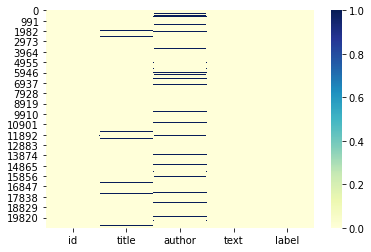

time: 422 ms (started: 2021-05-21 16:48:30 +03:00)


In [27]:
sns.heatmap(train.isnull(), cbar = True, cmap="YlGnBu")

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

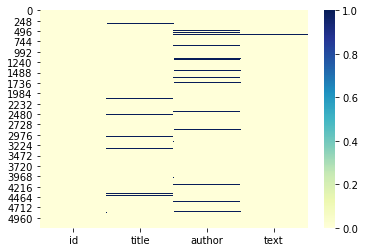

time: 328 ms (started: 2021-05-21 16:48:32 +03:00)


In [28]:
sns.heatmap(test.isnull(), cbar = True, cmap="YlGnBu")

In [29]:
train.isnull().sum()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id           0
title      558
author    1957
text        39
label        0
dtype: int64

time: 15 ms (started: 2021-05-21 16:48:33 +03:00)


In [30]:
test.isnull().sum()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id          0
title     122
author    503
text        7
dtype: int64

time: 0 ns (started: 2021-05-21 16:48:34 +03:00)


In [31]:
train.dropna(subset = ['text'] , axis = 0, inplace = True)

time: 15 ms (started: 2021-05-21 16:48:38 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20761 non-null  int64 
 1   title   20203 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20761 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 973.2+ KB
time: 16 ms (started: 2021-05-21 16:48:39 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB
time: 16 ms (started: 2021-05-21 16:48:43 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
train.label.value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    10387
1    10374
Name: label, dtype: int64

time: 0 ns (started: 2021-05-21 16:48:45 +03:00)


In [35]:
df.reset_index(inplace = True)

time: 0 ns (started: 2021-05-21 16:48:47 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
train_true = train[train.label == 0]
train_fake = train[train.label == 1]

time: 0 ns (started: 2021-05-21 16:48:49 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
df = df.applymap(str)

time: 63 ms (started: 2021-05-21 16:48:50 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
df.text

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
25995    Of all the dysfunctions that plague the world’...
25996    WASHINGTON  —   Gov. John Kasich of Ohio on Tu...
25997    Good morning. (Want to get California Today by...
25998    « Previous - Next » 300 US Marines To Be Deplo...
25999    Perhaps you’ve seen the new TV series whose pi...
Name: text, Length: 26000, dtype: object

time: 0 ns (started: 2021-05-21 16:48:52 +03:00)


In [39]:
# Load the regular expression library
import re
# Remove punctuation
train['text'] = \
train['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
train['text'] = \
train['text'].map(lambda x: x.lower())
# Print out the first rows of papers
train['text'].head(10)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-39-e12329a695fb>:5: DeprecationWarning: invalid escape sequence \.
  train['text'].map(lambda x: re.sub('[,\.!?]', '', x))


0    house dem aide: we didn’t even see comey’s let...
1    ever get the feeling your life circles the rou...
2    why the truth might get you fired october 29 2...
3    videos 15 civilians killed in single us airstr...
4    print \nan iranian woman has been sentenced to...
5    in these trying times jackie mason is the voic...
6    ever wonder how britain’s most iconic pop pian...
7    paris  —   france chose an idealistic traditio...
8    donald j trump is scheduled to make a highly a...
9    a week before michael t flynn resigned as nati...
Name: text, dtype: object

time: 1.72 s (started: 2021-05-21 16:48:52 +03:00)


In [40]:
train_true['words_length'] = train_true['text'].str.split().str.len()
train_fake['words_length'] = train_fake['text'].str.split().str.len()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-6d4c5b1d27c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['words_length'] = train_true['text'].str.split().str.len()


time: 1.75 s (started: 2021-05-21 16:48:57 +03:00)


<ipython-input-40-6d4c5b1d27c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['words_length'] = train_fake['text'].str.split().str.len()


In [41]:
train_true['words_length'].median()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


773.0

time: 16 ms (started: 2021-05-21 16:49:01 +03:00)


In [42]:
train_fake['words_length'].median()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


384.0

time: 0 ns (started: 2021-05-21 16:49:02 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([9.261e+03, 9.640e+02, 8.700e+01, 4.300e+01, 1.400e+01, 1.300e+01,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([1.00000e+00, 1.46440e+03, 2.92780e+03, 4.39120e+03, 5.85460e+03,
        7.31800e+03, 8.78140e+03, 1.02448e+04, 1.17082e+04, 1.31716e+04,
        1.46350e+04]),
 <BarContainer object of 10 artists>)

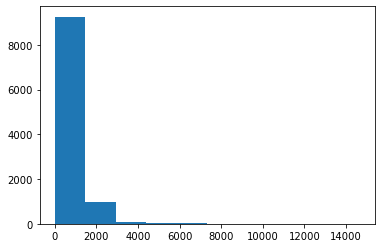

time: 157 ms (started: 2021-05-11 14:27:45 +03:00)


In [130]:
plt.hist(train_true.words_length, bins = 10)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([1.0048e+04, 2.7200e+02, 2.4000e+01, 1.7000e+01, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([    0. ,  2422.5,  4845. ,  7267.5,  9690. , 12112.5, 14535. ,
        16957.5, 19380. , 21802.5, 24225. ]),
 <BarContainer object of 10 artists>)

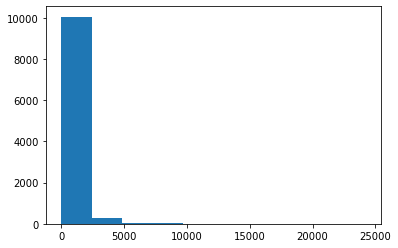

time: 140 ms (started: 2021-05-11 14:27:52 +03:00)


In [132]:
plt.hist(train_fake.words_length, bins = 10)

In [46]:
train_true['clean'] = train_true['text'].apply(lambda x: x.replace('\n', " "))
train_fake['clean'] = train_fake['text'].apply(lambda x: x.replace('\n', " "))

time: 78 ms (started: 2021-05-21 16:49:38 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-46-761e26abf518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['clean'] = train_true['text'].apply(lambda x: x.replace('\n', " "))
<ipython-input-46-761e26abf518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [47]:
train_true['clean'] = train_true['clean'].apply(lambda x: ' '.join(x.split()))
train_fake['clean'] = train_fake['clean'].apply(lambda x: ' '.join(x.split()))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-b2bd028b759b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['clean'] = train_true['clean'].apply(lambda x: ' '.join(x.split()))


time: 1.61 s (started: 2021-05-21 16:49:42 +03:00)


<ipython-input-47-b2bd028b759b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['clean'] = train_fake['clean'].apply(lambda x: ' '.join(x.split()))


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


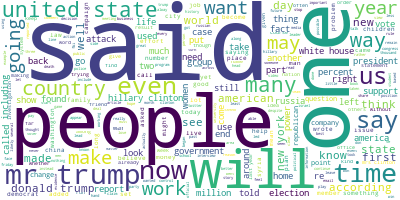

time: 1min 5s (started: 2021-05-11 12:48:09 +03:00)


In [56]:
# Join the different processed titles together.
long_string = ','.join(list(df['clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=7, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [44]:
stop = stopwords.words('english')

time: 188 ms (started: 2021-05-21 16:49:29 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

train_true['clean'] = np.vectorize(remove_pattern)(train_true['clean'], "@[\w]*")

train_fake['clean'] = np.vectorize(remove_pattern)(train_fake['clean'], "@[\w]*")

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \w
<>:9: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \w
<>:9: DeprecationWarning: invalid escape sequence \w
<ipython-input-48-d0c27c40221d>:7: DeprecationWarning: invalid escape sequence \w
  train_true['clean'] = np.vectorize(remove_pattern)(train_true['clean'], "@[\w]*")
<ipython-input-48-d0c27c40221d>:9: DeprecationWarning: invalid escape sequence \w
  train_fake['clean'] = np.vectorize(remove_pattern)(train_fake['clean'], "@[\w]*")
<ipython-input-48-d0c27c40221d>:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

time: 32.2 s (started: 2021-05-21 16:49:54 +03:00)


In [49]:
# removing non words
train_true['clean'] = train_true['clean'].str.replace("[^a-zA-Z#]", " ")
train_fake['clean'] = train_fake['clean'].str.replace("[^a-zA-Z#]", " ")

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-e1e95d7fe6f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['clean'] = train_true['clean'].str.replace("[^a-zA-Z#]", " ")


time: 6.11 s (started: 2021-05-21 16:50:26 +03:00)


<ipython-input-49-e1e95d7fe6f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['clean'] = train_fake['clean'].str.replace("[^a-zA-Z#]", " ")


In [50]:
# tokenize
train_true['clean'] =  train_true['clean'].apply(lambda x: x.split())

train_fake['clean'] =  train_fake['clean'].apply(lambda x: x.split())

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-c42646020f36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['clean'] =  train_true['clean'].apply(lambda x: x.split())


time: 1.53 s (started: 2021-05-21 16:50:32 +03:00)


<ipython-input-50-c42646020f36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['clean'] =  train_fake['clean'].apply(lambda x: x.split())


In [51]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
train_true['clean'] = train_true['clean'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

train_fake['clean'] = train_fake['clean'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-7d0a0d2ca785>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['clean'] = train_true['clean'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


time: 4min 16s (started: 2021-05-21 16:50:34 +03:00)


<ipython-input-51-7d0a0d2ca785>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['clean'] = train_fake['clean'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


In [52]:
# convert list to string
train_true['clean'] = [','.join(map(str, l)) for l in train_true['clean']]

train_fake['clean'] = [','.join(map(str, l)) for l in train_fake['clean']]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-52-620c4a503589>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['clean'] = [','.join(map(str, l)) for l in train_true['clean']]


time: 2.62 s (started: 2021-05-21 16:54:50 +03:00)


<ipython-input-52-620c4a503589>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['clean'] = [','.join(map(str, l)) for l in train_fake['clean']]


In [53]:
# remove less than 3 or equal to words
#three = df['clean'].apply(lambda x: ' '.join([w for w in x.split(',') if len(w) <= 3]))
train_true['clean'] = train_true['clean'].apply(lambda x: ' '.join([w for w in str(x).split(',') if len(w) > 3]))

train_fake['clean'] = train_fake['clean'].apply(lambda x: ' '.join([w for w in str(x).split(',') if len(w) > 3]))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-171ab4c23b22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['clean'] = train_true['clean'].apply(lambda x: ' '.join([w for w in str(x).split(',') if len(w) > 3]))


time: 2.66 s (started: 2021-05-21 16:54:53 +03:00)


<ipython-input-53-171ab4c23b22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['clean'] = train_fake['clean'].apply(lambda x: ' '.join([w for w in str(x).split(',') if len(w) > 3]))


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


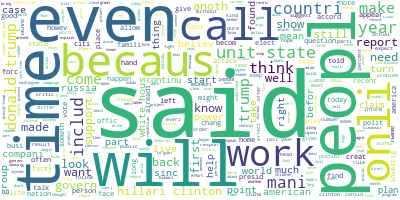

time: 1min 1s (started: 2021-05-11 12:58:16 +03:00)


In [65]:
# Join the different processed titles together.
long_string = ','.join(list(train_true['clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=7, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


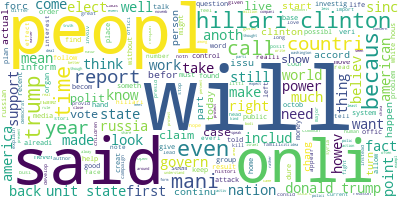

time: 21.4 s (started: 2021-05-11 13:53:29 +03:00)


In [99]:
# Join the different processed titles together.
long_string = ','.join(list(train_fake['clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=7, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [100]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

time: 16 ms (started: 2021-05-11 13:53:50 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
data = train_true['clean'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ever', 'feel', 'life', 'circl', 'roundabout', 'rather', 'head', 'straight', 'line', 'toward', 'intend', 'destin', 'hillari', 'clinton', 'remain', 'woman', 'campu', 'leafi', 'liber', 'wellesley', 'massachusett', 'everywher', 'vote', 'like', 'inaugur', 'dress', 'remaind', 'miss', 'havisham', 'forev']
time: 40.1 s (started: 2021-05-11 13:53:50 +03:00)


In [102]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 2)]
time: 9.69 s (started: 2021-05-11 13:54:30 +03:00)


In [103]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.018*"said" + 0.008*"trump" + 0.007*"would" + 0.005*"year" + 0.004*"time" '
  '+ 0.004*"presid" + 0.004*"state" + 0.004*"like" + 0.004*"peopl" + '
  '0.003*"also"'),
 (1,
  '0.010*"said" + 0.006*"state" + 0.005*"presid" + 0.005*"year" + 0.005*"like" '
  '+ 0.004*"trump" + 0.004*"would" + 0.004*"also" + 0.003*"nation" + '
  '0.003*"offic"'),
 (2,
  '0.016*"said" + 0.008*"trump" + 0.006*"state" + 0.005*"also" + 0.005*"year" '
  '+ 0.005*"peopl" + 0.004*"would" + 0.004*"like" + 0.004*"american" + '
  '0.003*"presid"'),
 (3,
  '0.010*"said" + 0.007*"trump" + 0.006*"year" + 0.005*"state" + 0.005*"time" '
  '+ 0.005*"like" + 0.005*"would" + 0.004*"peopl" + 0.004*"presid" + '
  '0.003*"last"'),
 (4,
  '0.016*"said" + 0.009*"trump" + 0.006*"state" + 0.005*"time" + 0.004*"like" '
  '+ 0.004*"would" + 0.004*"year" + 0.004*"presid" + 0.004*"peopl" + '
  '0.003*"becaus"'),
 (5,
  '0.012*"said" + 0.009*"trump" + 0.006*"presid" + 0.006*"state" + '
  '0.005*"would" + 0.004*"peopl" + 0.004*"y

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


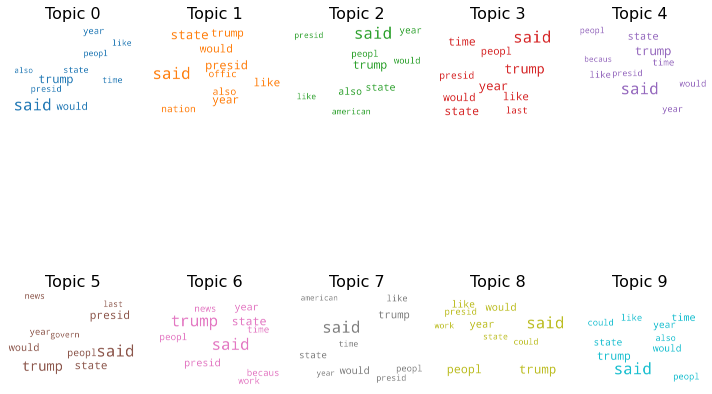

time: 9.88 s (started: 2021-05-11 13:55:01 +03:00)


In [104]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5 , figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


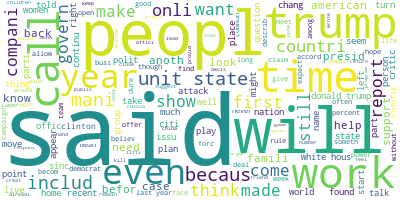

time: 35.1 s (started: 2021-05-11 13:55:11 +03:00)


In [105]:
# Join the different processed titles together.
long_string = ','.join(list(train_true['clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=7, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [106]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

time: 16 ms (started: 2021-05-11 13:55:46 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
data = train_fake['clean'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['hous', 'even', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'octob', 'subscrib', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'imag', 'courtesi', 'michael', 'jolley', 'avail', 'creativ', 'common', 'licens', 'apolog', 'keith', 'olbermann', 'doubt', 'worst']
time: 26.1 s (started: 2021-05-11 13:56:52 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 3), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 4), (28, 14), (29, 2)]
[(0,
  '0.006*"clinton" + 0.006*"trump" + 0.005*"peopl" + 0.004*"hillari" + '
  '0.004*"would" + 0.004*"like" + 0.004*"time" + 0.003*"govern" + 0.003*"also" '
  '+ 0.003*"year"'),
 (1,
  '0.010*"clinton" + 0.007*"trump" + 0.006*"like" + 0.005*"would" + '
  '0.005*"time" + 0.005*"hillari" + 0.004*"state" + 0.004*"peopl" + '
  '0.004*"also" + 0.004*"presid"'),
 (2,
  '0.005*"peopl" + 0.005*"year" + 0.005*"would" + 0.004*"said" + 0.004*"like" '
  '+ 0.004*"clinton" + 0.004*"trump" + 0.004*"also" + 0.003*"state" + '
  '0.003*"govern"'),
 (3,
  '0.007*"trump" + 0.006*"state" + 0.006*"peopl" + 0.005*"would" + '
  '0.005*"clinton" + 0.004*"time" + 0.004*"presid" + 0.004*"year" + '
  '0.004*"american" + 0.003*"right"'),
 (4,
  '0.008*"c

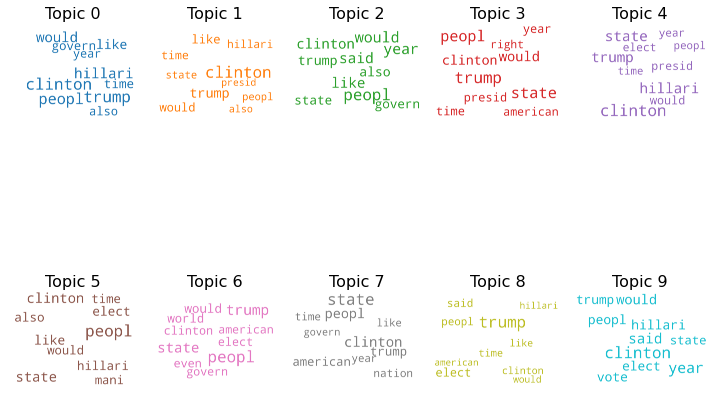

time: 37.1 s (started: 2021-05-11 13:57:18 +03:00)


In [110]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5 , figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [111]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

time: 235 ms (started: 2021-05-11 13:57:55 +03:00)


In [112]:
sia = SentimentIntensityAnalyzer()

time: 16 ms (started: 2021-05-11 13:57:55 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
def sentiment_scores(sentence):

	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()

	# polarity_scores method of SentimentIntensityAnalyzer
	# oject gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)
	
	#print("Overall sentiment dictionary is : ", sentiment_dict)
	#print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
	#print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
	#print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")


	#print("Sentence Overall Rated As", end = " ")

	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.05 :
		return ("Positive")

	elif sentiment_dict['compound'] <= - 0.05 :
		return ("Negative")

	else :
		return ("Neutral")

time: 0 ns (started: 2021-05-11 13:57:55 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
train_true['sentiments'] = train_true['clean'].apply(sentiment_scores)
train_fake['sentiments'] = train_fake['clean'].apply(sentiment_scores)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-114-9e9f69ea24cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['sentiments'] = train_true['clean'].apply(sentiment_scores)


time: 5min 32s (started: 2021-05-11 13:57:55 +03:00)


<ipython-input-114-9e9f69ea24cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['sentiments'] = train_fake['clean'].apply(sentiment_scores)


In [115]:
train_true['sentiments'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Positive    6154
Negative    4127
Neutral      106
Name: sentiments, dtype: int64

time: 0 ns (started: 2021-05-11 14:03:27 +03:00)


In [116]:
train_fake['sentiments'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Positive    5256
Negative    4234
Neutral      884
Name: sentiments, dtype: int64

time: 0 ns (started: 2021-05-11 14:03:27 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


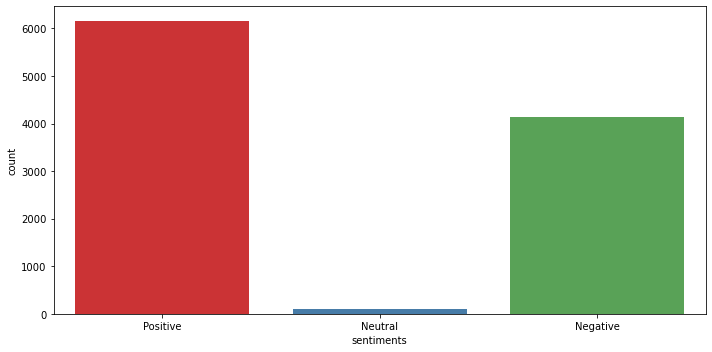

time: 141 ms (started: 2021-05-11 14:03:27 +03:00)


In [117]:
fig = plt.figure(figsize =(10, 5))
ax = plt.axes()
sns.countplot(x = train_true['sentiments'], palette = "Set1")
plt.tight_layout()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


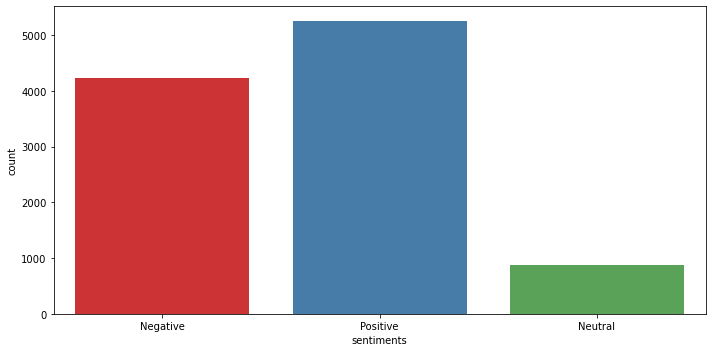

time: 141 ms (started: 2021-05-11 14:03:28 +03:00)


In [118]:
fig = plt.figure(figsize =(10, 5))
ax = plt.axes()
sns.countplot(x = train_fake['sentiments'], palette = "Set1")
plt.tight_layout()

In [119]:
df[df['sentiments'] == 'Positive']

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,id,title,author,text,label,words_length,clean,sentiments,hate_speech,hate_speech_class
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles the rou...,0.0,710,ever feel your life circl roundabout rather th...,Positive,{'text': 'ever feel your life circl roundabout...,neither
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired october 29 2...,1.0,1264,truth might fire octob tension between intelli...,Positive,{'text': 'truth might fire octob tension betwe...,neither
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,in these trying times jackie mason is the voic...,0.0,203,these time jacki mason voic reason week exclus...,Positive,{'text': 'these time jacki mason voic reason w...,neither
6,6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,nan,ever wonder how britain’s most iconic pop pian...,1.0,489,ever wonder britain most icon pianist through ...,Positive,{'text': 'ever wonder britain most icon pianis...,neither
7,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,paris — france chose an idealistic traditio...,0.0,821,pari franc chose idealist tradit candid sunday...,Positive,{'text': 'pari franc chose idealist tradit can...,neither
...,...,...,...,...,...,...,...,...,...,...,...
25949,5188,25988,"The Dangers of ‘Polypharmacy,’ the Ever-Mounti...",Paula Span,dr caleb alexander knows how easily older peop...,nan,1113,caleb alexand know easili older peopl fall int...,Positive,{'text': 'caleb alexand know easili older peop...,neither
25952,5191,25991,E3 Hands-On with ’South Park: The Fractured bu...,Lucas Nolan,the title of south park: the fractured but who...,nan,567,titl south park fractur whole essenti comed to...,Positive,{'text': 'titl south park fractur whole essent...,neither
25955,5194,25994,Trump on If ’Tapes’ Exist of Comey Conversatio...,Pam Key,pres trump on if “tapes” exist of his conversa...,nan,233,trump tape exist convers with comey well tell ...,Positive,{'text': 'trump tape exist convers with comey ...,neither
25959,5198,25998,300 US Marines To Be Deployed To Russian Borde...,nan,« previous - next » 300 us marines to be deplo...,nan,462,previou next marin deploy russian border norwa...,Positive,{'text': 'previou next marin deploy russian bo...,neither


time: 516 ms (started: 2021-05-11 14:03:28 +03:00)


In [120]:
train_true['hate_speech'] = train_true['clean'].apply(lambda x: sonar.ping(text = x))
train_fake['hate_speech'] = train_fake['clean'].apply(lambda x: sonar.ping(text = x))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-120-7922a1a11c75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['hate_speech'] = train_true['clean'].apply(lambda x: sonar.ping(text = x))


time: 28.1 s (started: 2021-05-11 14:03:28 +03:00)


<ipython-input-120-7922a1a11c75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['hate_speech'] = train_fake['clean'].apply(lambda x: sonar.ping(text = x))


In [121]:
train_true['hate_speech_class'] = train_true['hate_speech'].apply(lambda x: x['top_class'])
train_fake['hate_speech_class'] = train_fake['hate_speech'].apply(lambda x: x['top_class'])

time: 0 ns (started: 2021-05-11 14:03:56 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-121-b039ac56e19a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['hate_speech_class'] = train_true['hate_speech'].apply(lambda x: x['top_class'])
<ipython-input-121-b039ac56e19a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [122]:
train_true['hate_speech_class'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


neither               10023
offensive_language      324
hate_speech              40
Name: hate_speech_class, dtype: int64

time: 16 ms (started: 2021-05-11 14:03:56 +03:00)


In [123]:
train_fake['hate_speech_class'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


neither               9932
offensive_language     372
hate_speech             70
Name: hate_speech_class, dtype: int64

time: 0 ns (started: 2021-05-11 14:03:56 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\shakshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hate_speech_class', ylabel='count'>

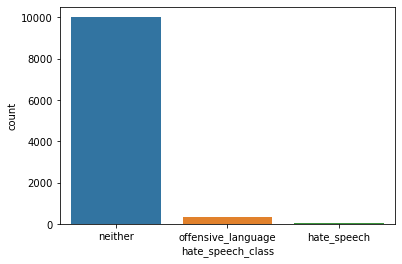

time: 125 ms (started: 2021-05-11 14:03:56 +03:00)


In [124]:
sns.countplot(train_true['hate_speech_class'])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\shakshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hate_speech_class', ylabel='count'>

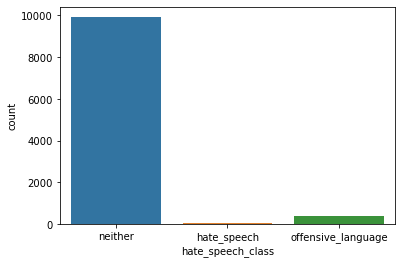

time: 125 ms (started: 2021-05-11 14:03:57 +03:00)


In [125]:
sns.countplot(train_fake['hate_speech_class'])

# emotions

In [55]:
import text2emotion as te

time: 172 ms (started: 2021-05-21 17:05:07 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
train_true['emotions'] = train_true['clean'].apply(lambda text: te.get_emotion(text))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time: 8h 51min 59s (started: 2021-05-21 17:05:08 +03:00)


<ipython-input-56-2b9c6f70e961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['emotions'] = train_true['clean'].apply(lambda text: te.get_emotion(text))


In [57]:
train_fake['emotions'] = train_fake['clean'].apply(lambda text: te.get_emotion(text))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time: 5h 33min 15s (started: 2021-05-22 01:57:08 +03:00)


<ipython-input-57-2b40aeff9c59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fake['emotions'] = train_fake['clean'].apply(lambda text: te.get_emotion(text))


In [60]:
def emotions(x):
    b = 'null'
    m = max(x['Happy'], x['Angry'], x['Surprise'], x['Sad'], x['Fear'])
    if (m == x['Happy']):
        a = 'Happy'  
    elif (m == x['Angry']):
        a = 'Angry'
    elif (m == x['Surprise']):
        a = 'Surprise'
    elif (m == x['Sad']):
        a = 'Sad'
    elif (m == x['Fear']):
        a = 'Fear'
    return a

train_true['emotions_class'] = train_true['emotions'].apply(emotions)
train_fake['emotions_class'] = train_fake['emotions'].apply(emotions)

time: 31 ms (started: 2021-05-23 00:00:59 +03:00)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-e01ca77ac13e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_true['emotions_class'] = train_true['emotions'].apply(emotions)
<ipython-input-60-e01ca77ac13e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\shakshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emotions_class', ylabel='count'>

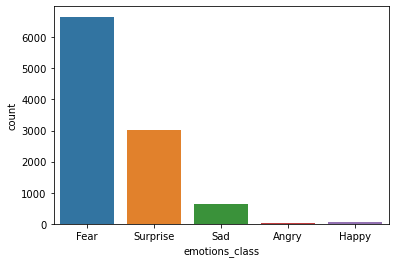

time: 203 ms (started: 2021-05-23 00:01:23 +03:00)


In [61]:
sns.countplot(train_true['emotions_class'])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\shakshi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emotions_class', ylabel='count'>

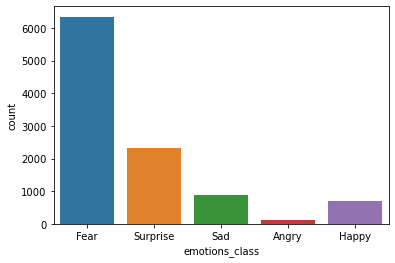

time: 156 ms (started: 2021-05-23 00:01:34 +03:00)


In [62]:
sns.countplot(train_fake['emotions_class'])